Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/' , force_remount=True)
%cd drive/My Drive/Hugging_Face

Mounted at /content/drive/
/content/drive/My Drive/Hugging_Face


Install dependencies

In [ ]:
!pip install --upgrade diffusers transformers scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 35.7 MB/s 
     |████████████████████████████████| 4.7 MB 56.6 MB/s 
     |████████████████████████████████| 120 kB 74.1 MB/s 
     |████████████████████████████████| 6.6 MB 58.0 MB/s 


login to your huggingface account in order to get a token

In [ ]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

In [ ]:
import torch
from torch import autocast
#from diffusers import StableDiffusionPipeline

from diffusers import StableDiffusionPipeline, LMSDiscreteScheduler

model_id = "CompVis/stable-diffusion-v1-4"
# Use the K-LMS scheduler here instead
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_auth_token=True)
pipe = pipe.to("cuda")




Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


0it [00:00, ?it/s]

In [ ]:
prompt = "a photo of an astronaut riding a horse on mars"
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5)["sample"][0]  
image    
#image.save(f"{prompt}.png")

0it [00:00, ?it/s]

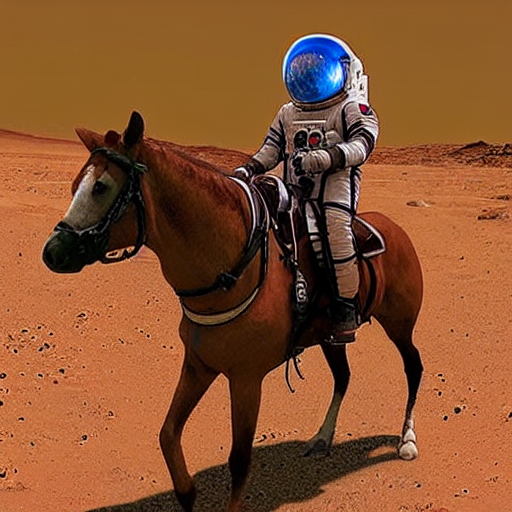

In [ ]:

prompt =  "a photo of an african woman in beach"
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5)["sample"][0]  
image
#image.save(f"{prompt}.png")